 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [24]:
# Reading whale returns
df=pd.read_csv(r"C:\Users\pwals\OneDrive\Desktop\aapl_historical.csv")
dg=pd.read_csv(r"C:\Users\pwals\OneDrive\Desktop\sp500_history.csv")
dh=pd.read_csv(r"C:\Users\pwals\OneDrive\Desktop\algo_returns.csv")
dj=pd.read_csv(r"C:\Users\pwals\OneDrive\Desktop\cost_historical.csv")
dk=pd.read_csv(r"C:\Users\pwals\OneDrive\Desktop\goog_historical.csv")


In [15]:
# Count nulls
nan_count = df.isna().sum()
nan_count1 = dg.isna().sum()
nan_count2 = dh.isna().sum()
nan_count3 = dj.isna().sum()
nan_count4 = dk.isna().sum()

print(nan_count)
print(nan_count1)
print(nan_count2)
print(nan_count3)
print(nan_count4)

Symbol        0
Trade DATE    0
NOCP          0
dtype: int64
Date     0
Close    0
dtype: int64
Date      0
Algo 1    0
Algo 2    6
dtype: int64
Symbol        0
Trade DATE    0
NOCP          0
dtype: int64
Symbol        0
Trade DATE    0
NOCP          0
dtype: int64


In [16]:
# Drop nulls
df.dropna
dg.dropna
dh.dropna
dj.dropna
dk.dropna

<bound method DataFrame.dropna of     Symbol Trade DATE     NOCP
0     GOOG   5/9/2019  1162.38
1     GOOG   5/8/2019  1166.27
2     GOOG   5/7/2019  1174.10
3     GOOG   5/6/2019  1189.39
4     GOOG   5/3/2019  1185.40
..     ...        ...      ...
245   GOOG  5/17/2018  1078.59
246   GOOG  5/16/2018  1081.77
247   GOOG  5/15/2018  1079.23
248   GOOG  5/14/2018  1100.20
249   GOOG  5/11/2018  1098.26

[250 rows x 3 columns]>

In [18]:
# Reading algorithmic returns
df.pct_change()
dg.pct_change()
dh.pct_change()
dj.pct_change()
dk.pct_change()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
# Count nulls


In [ ]:
# Drop nulls


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [20]:
# Reading S&P 500 Closing Prices
dg.head

<bound method NDFrame.head of            Date     Close
0     23-Apr-19  $2933.68
1     22-Apr-19  $2907.97
2     18-Apr-19  $2905.03
3     17-Apr-19  $2900.45
4     16-Apr-19  $2907.06
...         ...       ...
1644   5-Oct-12  $1460.93
1645   4-Oct-12  $1461.40
1646   3-Oct-12  $1450.99
1647   2-Oct-12  $1445.75
1648   1-Oct-12  $1444.49

[1649 rows x 2 columns]>

In [21]:
# Check Data Types
dg.dtypes

Date     object
Close    object
dtype: object

In [ ]:
# Fix Data Types


In [ ]:
# Calculate Daily Returns


In [ ]:
# Drop nulls


In [ ]:
# Rename `Close` Column to be specific to this portfolio.


## Combine Whale, Algorithmic, and S&P 500 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
# Plot daily returns of all portfolios


#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios
portfolio_returns = all_returns.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot()
# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk


### Calculate Standard Deviations

<AxesSubplot:>

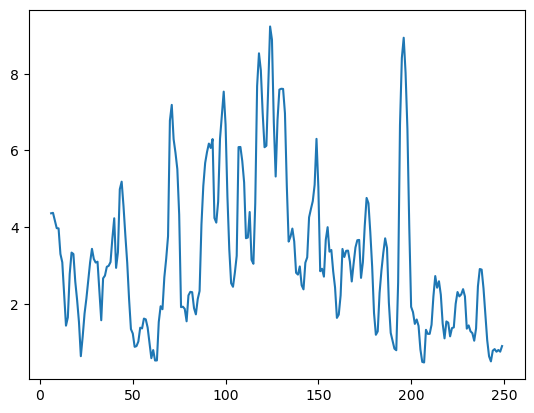

In [22]:
# Calculate the daily standard deviations of all portfolios
df["NOCP"].rolling(window=7).std().plot()

### Determine which portfolios are riskier than the S&P 500

In [25]:
# Calculate  the daily standard deviation of S&P 50
dg["Close"].rolling(window=7).std().plot()
# Determine which portfolios are riskier than the S&P 500


DataError: No numeric types to aggregate

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:>

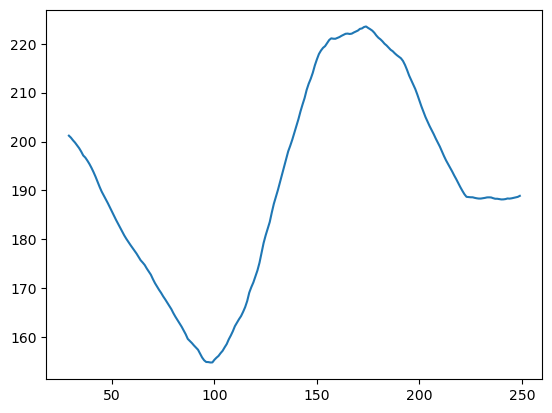

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df["NOCP"].rolling(window=30).mean().plot()
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = daily_returns.corr()
correlation
correlation.plot()

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
df.head


<bound method NDFrame.head of     Symbol Trade DATE    NOCP
0     AAPL   5/9/2019  200.72
1     AAPL   5/8/2019  202.90
2     AAPL   5/7/2019  202.86
3     AAPL   5/6/2019  208.48
4     AAPL   5/3/2019  211.75
..     ...        ...     ...
245   AAPL  5/17/2018  186.99
246   AAPL  5/16/2018  188.18
247   AAPL  5/15/2018  186.44
248   AAPL  5/14/2018  188.15
249   AAPL  5/11/2018  188.59

[250 rows x 3 columns]>

In [29]:
# Reading data from 2nd stock
dh.head

<bound method NDFrame.head of             Date    Algo 1    Algo 2
0     2014-05-28  0.001745       NaN
1     2014-05-29  0.003978       NaN
2     2014-05-30  0.004464       NaN
3     2014-06-02  0.005692       NaN
4     2014-06-03  0.005292       NaN
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1241 rows x 3 columns]>

In [30]:
# Reading data from 3rd stock
dj.head

<bound method NDFrame.head of     Symbol Trade DATE    NOCP
0     COST   5/9/2019  243.47
1     COST   5/8/2019  241.34
2     COST   5/7/2019  240.18
3     COST   5/6/2019  244.23
4     COST   5/3/2019  244.62
..     ...        ...     ...
245   COST  5/17/2018  199.60
246   COST  5/16/2018  198.71
247   COST  5/15/2018  195.48
248   COST  5/14/2018  195.88
249   COST  5/11/2018  195.76

[250 rows x 3 columns]>

In [27]:
# Combine all stocks in a single DataFrame

frames = [df, dg, dh,dj,dk]

result = pd.concat(frames)

In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!